# Single Layer LSTM

In [17]:
#import paskages

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow_datasets as tfds


Download the dataset

In [ ]:
#Download data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete08E4DA/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete08E4DA/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete08E4DA/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
#Tokenizer
tokenizer = info.features['text'].encoder

##### Prepare the dataset

To make the training go faster in this lab, you will increase the batch size

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

In [ ]:
train_data , test_data = dataset['train'] , dataset['test']

In [ ]:
## Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

In [ ]:
#Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_data.padded_batch(BATCH_SIZE)

### Build and compile the model

In [ ]:
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

In [ ]:
#Build Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size , embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim , activation='relu'),
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

In [ ]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

###### Train the model

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset , epochs=NUM_EPOCHS ,
                   validation_data=(test_dataset))

Epoch 1/10
98/98 [==============================] - 1221s 12s/step - loss: 0.6675 - accuracy: 0.6069 - val_loss: 0.5704 - val_accuracy: 0.7023
Epoch 2/10
98/98 [==============================] - 1231s 13s/step - loss: 0.3813 - accuracy: 0.8369 - val_loss: 0.3744 - val_accuracy: 0.8408
Epoch 3/10
98/98 [==============================] - 1216s 12s/step - loss: 0.2599 - accuracy: 0.9019 - val_loss: 0.3669 - val_accuracy: 0.8520
Epoch 4/10
98/98 [==============================] - 1204s 12s/step - loss: 0.2041 - accuracy: 0.9268 - val_loss: 0.3714 - val_accuracy: 0.8501
Epoch 5/10
98/98 [==============================] - 1149s 12s/step - loss: 0.1746 - accuracy: 0.9382 - val_loss: 0.4196 - val_accuracy: 0.8302
Epoch 6/10
98/98 [==============================] - 1219s 12s/step - loss: 0.1446 - accuracy: 0.9496 - val_loss: 0.4628 - val_accuracy: 0.8117
Epoch 7/10
98/98 [==============================] - 1219s 12s/step - loss: 0.1158 - accuracy: 0.9610 - val_loss: 0.4730 - val_accuracy: 0.8302

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

AttributeError: ignored

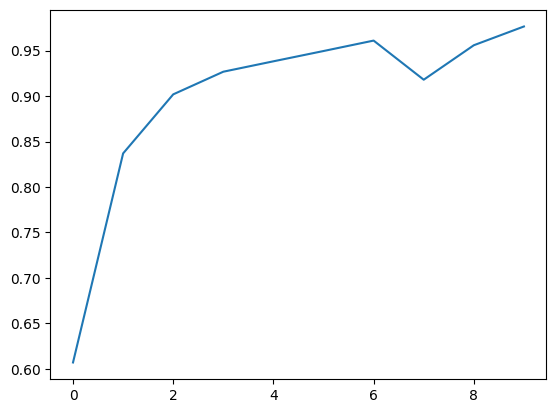

In [19]:
plot_graph(history,'accuracy')


AttributeError: ignored

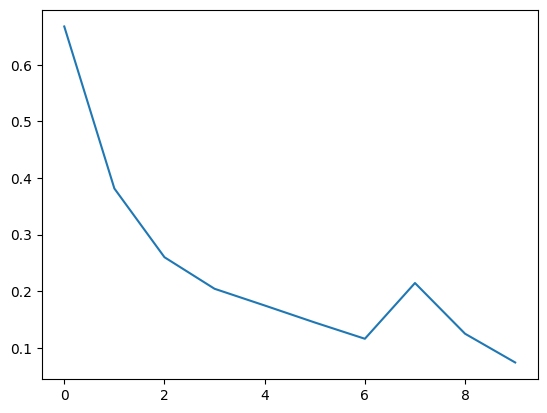

In [20]:
plot_graph(history ,'loss')